<a href="https://colab.research.google.com/github/roberto-paixao/Analise_Airbnb_Toquio/blob/main/Analisando_os_Dados_do_Airbnb_(T%C3%B3quio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Airbnb-logo" width="500" src="https://www.dgtlnk.com/wp-content/uploads/airbnb_logo_detail.jpg"></center>


---

# Análise dos Dados do Airbnb - Tóquio


O [Airbnb](https://www.airbnb.com.br/) é um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem, fundada em 2008, a empresa hoje possui um valor estimado de mais de 1 bilhão de dólares. A  plataforma já se tornou a solução ideal para quem prefere se hospedar em uma casa, apartamento e entre vários tipos de acomodações disponíveis em seu catálogo.

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Tóquio, e ver quais insights podem ser extraídos a partir de dados brutos.**
<br><br>

<center><img alt="Tokyo-shibuya" width="700" height="350" src="https://viagensdestinos.com/wp-content/uploads/2018/06/shibuya-crossing-toquio.jpg">
</center>



# **Tóquio, Japão**


A região metropolitana de Tóquio possui aproximadamente *37 milhões de habitantes*, o maior aglomerado urbano do mundo, é constituída por *23 bairros, 26 municípios adicionais e as ilhas Izu e Ogasawara*.

Tóquio possui diversos pontos turísticos, como *Meiji* e *Senso-ji* (ambos são santuários famosos), templos budistas, parques, jardins (*Ueno e Yoyogi*).

Em 2019, o país registrou o seu oitavo crescimento no número de visitantes, chegando a *31,8 milhões*, esse número representa um aumento de 467% em um década, saindo de *7 milhões* para quase *32 milhões* de visitantes.

---

## Obtenção dos Dados

Os dados foram coletados do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Nesta análise inicial, usaremos o arquivo:
* `listings.csv` - *Summary information and metrics for listings in Tokyo (good for visualisations).*

O arquivo `listing.csv` é uma versão resumida de um dataset maior, com mais atributos (*features*). Entretanto, para uma análise inicial, a versão resumida servirá ao nosso propósito.


In [1]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

 # Configurações de gráficos

sns.set()
sns.set_style("white")
%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-01-27/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - grupo no qual o bairro pertence
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,11000,3,165,2020-03-04,1.45,1,328
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7272,3,228,2020-01-18,2.29,1,138
2,899003,"Classy room @Shinjuku, Takadanoba",4799233,Yu,NaN,Shinjuku Ku,35.70865,139.69681,Entire home/apt,5200,30,93,2019-11-25,0.96,2,180
3,1016831,WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya,5596383,Wakana,NaN,Setagaya Ku,35.65833,139.67153,Private room,11000,1,211,2020-03-16,2.22,1,139
4,1033276,private room @Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74253,139.79730,Private room,30000,1,72,2018-06-17,0.76,2,271


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Ver quais os tipos das variáveis que estão presentes no dataset nos mostrará se há algum atributo com o tipo incorreto ou diferente do normal para aquele tipo de atributo.

In [4]:
# Identificar o volume de dados do DataFrame
observacoes = df.shape[0]
atributos = df.shape[1]

print("Observações:\t",observacoes)
print("Atributos:\t", atributos,"\n")

# Tipos de variáveis do DataFrame
df.dtypes

Observações:	 11389
Atributos:	 16 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É muito importante verificar a quantidade de valores ausentes em um _dataset_ pois dependendo da proporção de dados faltantes, pode ser um problema ter uma *feature* com muitos dados faltantes, veremos isso agora:



In [5]:
df.isnull().mean().sort_values(ascending=False).round(4)*100

neighbourhood_group               100.00
reviews_per_month                  18.97
last_review                        18.97
host_name                           0.19
availability_365                    0.00
calculated_host_listings_count      0.00
number_of_reviews                   0.00
minimum_nights                      0.00
price                               0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
host_id                             0.00
name                                0.00
id                                  0.00
dtype: float64

A função a seguir criará um gráfico que ajudará a visualizar melhor essa porcentagem faltante.

In [15]:
def porcentagem_faltante(df):
    figsize(10,8)
    ax, fig = plt.subplots()

    missing_percent = df.isnull().mean().sort_values(ascending=False).round(3)*100

   
    
    # Plot
    splot = sns.barplot(missing_percent.values, missing_percent.index, orient='h', color='SteelBlue');

    for p in splot.patches:
        width=p.get_width()

        if width <= 0.1:

            plt.text(p.get_width()+2.5, p.get_y()+0.55*p.get_height(),
                        '{}%'.format(width),
                        ha='center', va='center', color='lightgrey', size=12)
        
        elif width > 0.1 and width <= 0.2:
            plt.text(p.get_width()+2.5, p.get_y()+0.55*p.get_height(),
                        '{}%'.format(width),
                        ha='center', va='center', color='grey', size=12)
        
        else:
            plt.text(p.get_width()-5, p.get_y()+0.55*p.get_height(),
                        '{}%'.format(width),
                        ha='center', va='center', color='white', size=12, fontweight='light')

           
            
    fig.set_title('Porcentagem Faltante (%)\n', size=20, color='grey', loc='left')
    plt.xticks([], color='white')
    sns.despine(left=True, bottom=True);
    plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


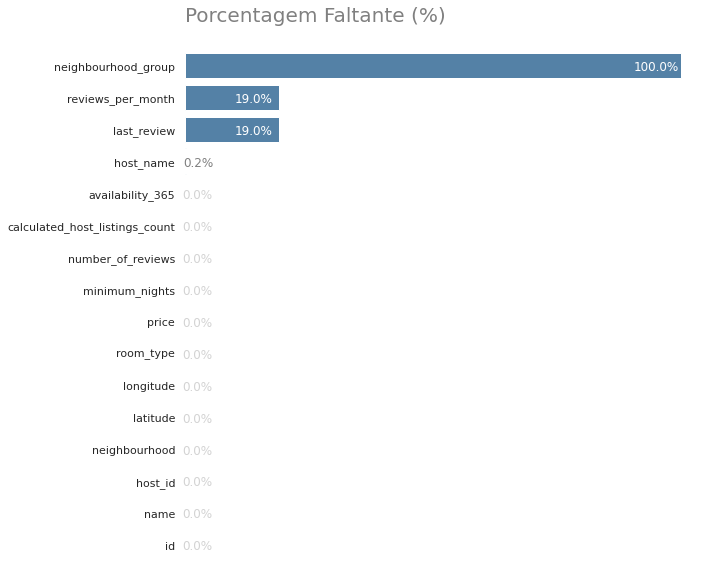

In [16]:
porcentagem_faltante(df)

Com base nos valores obtidos, podemos afirmar que:
* A feature `neighbourhood_group` está totalmente sem valor algum.
* As features `reviews_per_month` e `calculated_host_listing_count` estão com aproximadamente 19% dos dados faltantes.
* A feature `last_review` possui aproximadamente 0,2% de dados faltantes.

### **Q3. Qual o tipo de distribuição das variáveis?** 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


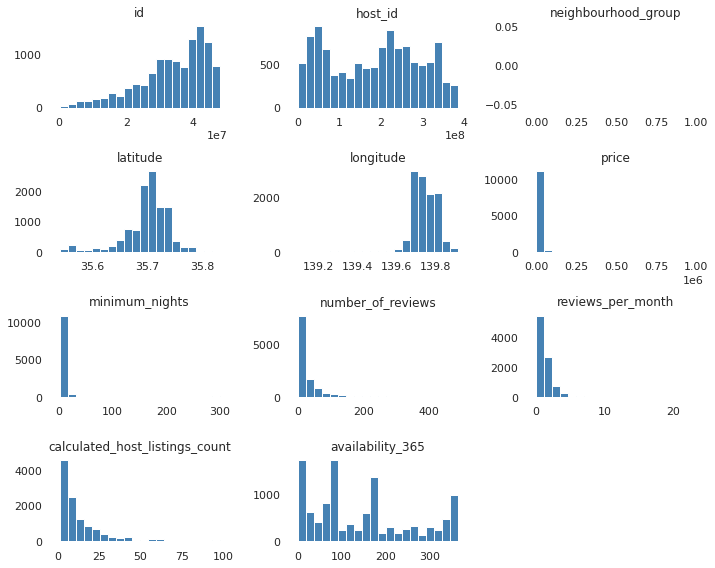

In [ ]:
# plotar o histograma das variáveis numéricas
fig, ax = plt.subplots()

df.hist(bins=20, color="Steelblue", grid=False, ax=ax);

sns.set_style('white')
sns.despine(left=True, bottom=True)

plt.tight_layout()

As _features_ (atributos) `neighbourhood_group` (vazia), `price`, `minimum_nights` e `calculated_host_listings_count` aparentam possuir outliers pois não apresentem uma distribuição bem definida.

### **Q4. Há *outliers* presentes?**

Olhando o histograma acima, é possível observar que as *features* `price`, `minimum_nights` e `calculated_host_listings_count` não seguem uma distribuição, o que pode indicar a presença de *outliers*.<br>
Para confirmar sua presença, há duas maneiras de identificá-los:
* O método `describe()` do `pandas`, mostra um resumo estatístico do DataFrame.
* Uso do gráfico do tipo `boxplot` para a variável.

In [17]:
# Resumo Estatístico do DataFrame
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11389.000000,11389.000000,11389.000000,9228.000000,11389.000000,11389.000000
mean,11981.453683,3.758539,26.097375,1.219632,12.799807,146.416542
std,31289.740038,17.642326,41.181398,1.152064,15.054536,115.123767
min,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,4000.000000,1.000000,1.000000,0.420000,3.000000,58.000000
50%,6571.000000,1.000000,10.000000,0.990000,7.000000,120.000000
75%,12000.000000,2.000000,34.000000,1.680000,17.000000,221.000000
max,1000000.000000,300.000000,488.000000,23.380000,98.000000,365.000000


As *features* `id` e `host_id` não foram selecionadas para o resumo por se tratarem de atributos de identificação, que não influenciariam em nada.

Na *feature* `price`, a moeda está em *Iene*, para efeitos de comparações futuras, converteremos em *Real* seguindo a fórmula com a cotação atual do Iene do dia 03/03/2021.

* __1 Real = 18.65 Ienes japonês__ ou  __0.054 Iene = 1 Real brasileiro__



In [18]:
# Conversão da feature 'price'
# De Iene japonês para Real brasileiro

df['price'] = df['price'] / 18.65

In [19]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11389.000000,11389.000000,11389.000000,9228.000000,11389.000000,11389.000000
mean,642.437195,3.758539,26.097375,1.219632,12.799807,146.416542
std,1677.734050,17.642326,41.181398,1.152064,15.054536,115.123767
min,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,214.477212,1.000000,1.000000,0.420000,3.000000,58.000000
50%,352.332440,1.000000,10.000000,0.990000,7.000000,120.000000
75%,643.431635,2.000000,34.000000,1.680000,17.000000,221.000000
max,53619.302949,300.000000,488.000000,23.380000,98.000000,365.000000


Observando o resumo estatístico, vemos que:
* O atributo `price` possui 75% dos valores abaixo de R\$642.43 (*valor convertido*) enquanto o seu máximo é R$53.619,30.
* A média de `minimum_nights` é de 3.75 enquanto sua máxima é 300.
* 75% dos valores em `minimum_nights` estão abaixo de 2.
* O valor mínimo de `price` é 0, o que pode significar um erro de digitação ou outro tipo de problema, como por exemplo, o anfitrião só dirá o valor quando o possível hóspede entrar em contato.


#### Boxplot
O `boxplot` nos ajudará a visualizar melhor as discrepâncias (_outliers_) dos dados.

#### Boxplot para `price`

Preço acima de R$643.43
2863 observações
25.14%

Preço = 0
1 observações
0.01%


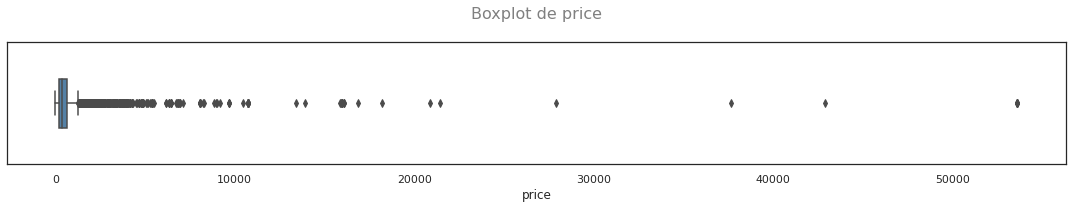

In [20]:
# Selecionando o atributo 'price' e gerando o boxplot
fig, ax = plt.subplots(figsize=(15,3))

sns.boxplot(x=df['price'], width=0.4, color='SteelBlue', ax=ax)
ax.set_title('Boxplot de price\n', size=16, color='grey')

sns.set_style('white')
plt.tight_layout()

# Quantidade de valores(%) em 'price' acima de R$643.43
print("Preço acima de R$643.43")
print("{} observações".format(len(df[df.price > 643.43])))
print("{:.2f}%".format((len(df[df.price > 643.43]) / df.shape[0])*100))

# Quantidade de valores(%) em 'price' igual a R$0.00
print("\nPreço = 0")
print("{} observações".format(len(df[df.price == 0])))
print("{:.2f}%".format((len(df[df.price == 0]) / df.shape[0])*100))

#### Boxplot para `minimum_nights`

minimum_nights - acima de 2 dias:
1654 observações
14.52%


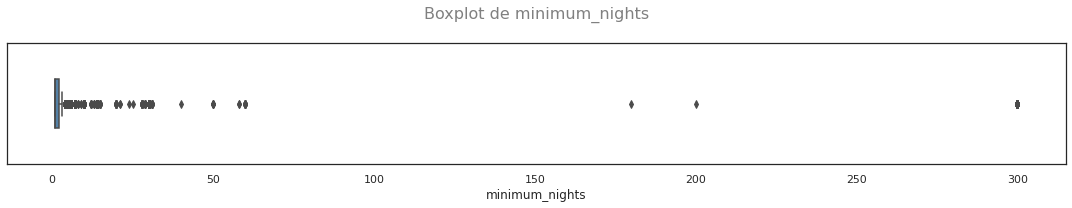

In [27]:
# Selecionando o atributo 'minimum_nights' e gerando um boxplot

fig, ax = plt.subplots(figsize=(15,3))
sns.boxplot(x=df['minimum_nights'], width=0.4, color='SteelBlue', ax=ax)
ax.set_title('Boxplot de minimum_nights\n', size=16, color='grey')
plt.tight_layout()

# Quantidade de valores(%) em 'minimum_nights' acima de 2 dias
print("minimum_nights - acima de 2 dias:")
print("{} observações".format(len(df[df.minimum_nights > 2])))
print("{:.2f}%".format((len(df[df.minimum_nights > 2]) / df.shape[0])*100))

Em `minimum_nights`, apenas 14.52% dos dados estão com valores acima de 2, então os removeremos.


#### Histogramas sem *outliers*

Identificados os *outliers* de `price` e `minimum_nights`, então é hora de removê-los e checar novamente o histograma.

In [28]:
# Copiando o DataFrame e removendo os outliers
df_clean = df.copy()

# Deletando os outliers
df_clean.drop(df_clean[df_clean.price > 643.43].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 2].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)

# Removendo a feature que está sem dados.
df_clean.drop('neighbourhood_group', axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


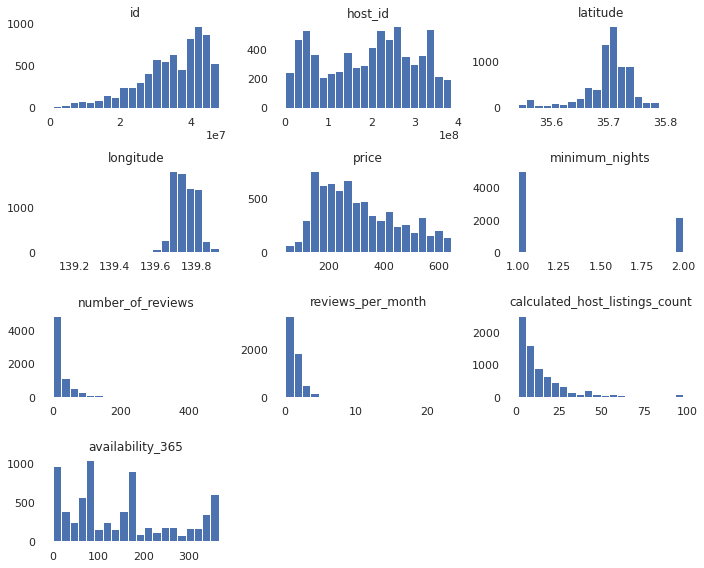

In [29]:
# Plotando o histograma novamente.
fig, ax = plt.subplots()
sns.set_style('white')

df_clean.hist(bins=20, grid=False, ax=ax)

sns.despine(left=True, bottom=True)

plt.tight_layout()

Boxplot de `price` após a remoção dos outliers


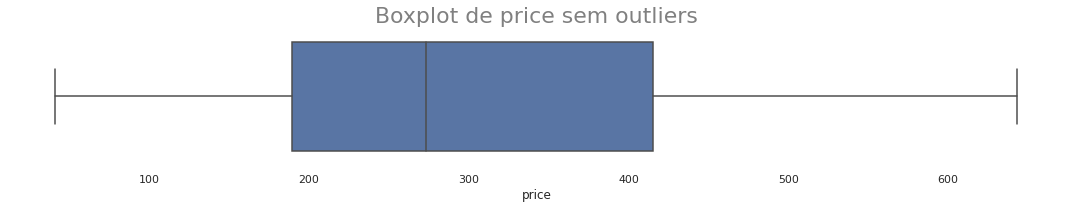

In [30]:
fig, ax = plt.subplots(figsize=(15,3))

sns.boxplot(x=df_clean['price'])
ax.set_title('Boxplot de price sem outliers', size=22, color='grey')

sns.despine(left=True, bottom=True)
plt.tight_layout()

### **Q4. Qual a correlação existente entre as variáveis**

A correlação expõe o quanto uma variável pode estar relacionada a outra, seja positivamente ou negativamente.

A função do coeficiente de correlação é estabelecer a __intensidade__ dessa relação.

Para identificar as correlações entre as variáveis, iremos:

* Gerar uma matriz de correlação
* Criar um *heatmap*(mapa de calor) usando a biblioteca `seaborn`

In [31]:
# Gerando a matriz de correlação
features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']

matriz_corr = df_clean[features].corr()

display(matriz_corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.019996,0.000247,0.024048,-0.167181,-0.115373
minimum_nights,0.019996,1.000000,0.044161,-0.032998,-0.085458,0.085041
number_of_reviews,0.000247,0.044161,1.000000,0.682361,-0.158924,0.019650
reviews_per_month,0.024048,-0.032998,0.682361,1.000000,-0.156049,-0.019312
calculated_host_listings_count,-0.167181,-0.085458,-0.158924,-0.156049,1.000000,0.128825
availability_365,-0.115373,0.085041,0.019650,-0.019312,0.128825,1.000000


Para melhor visualizar a intensidade dessas relações, o gráfico de _heatmap_ é a melhor opção.

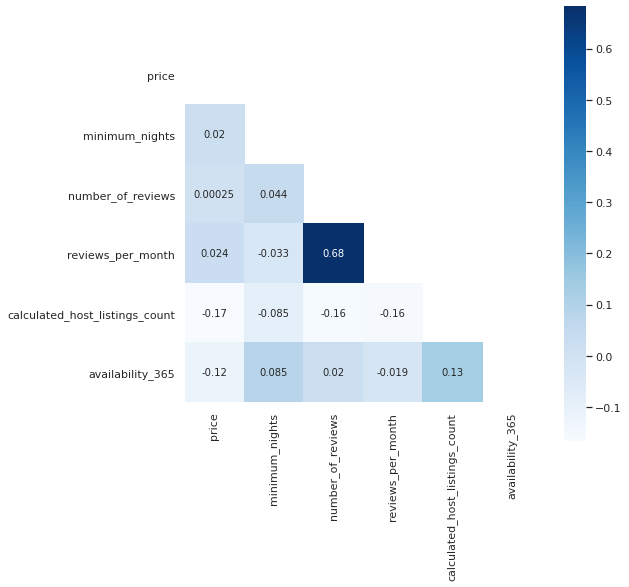

In [32]:
# Gerando um heatmap da matriz de correlação
figsize(8, 8)

mask = np.triu(np.ones_like(matriz_corr, dtype=bool))

sns.heatmap(matriz_corr, cmap="Blues", mask=mask, square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Utilizando a função `value_counts()` do Pandas, é possível obter uma contagem dos valores de um atributo (_feature_).

Neste caso, usaremos o `value_counts()` na _feature_ `room_type` para descobrir qual o tipo de imóvel mais alugado do Airbnb de Tóquio.

In [33]:
# Quantidade de cada tipo de alocação anunciada
df_clean.room_type.value_counts()

Entire home/apt    4849
Private room       1668
Hotel room          364
Shared room         344
Name: room_type, dtype: int64

In [34]:
# Porcentagem de cada tipo de alocação anunciada
(df_clean.room_type.value_counts() / df_clean.shape[0]).round(4)*100

Entire home/apt    67.11
Private room       23.09
Hotel room          5.04
Shared room         4.76
Name: room_type, dtype: float64

Visualizando graficamente essa contagem.

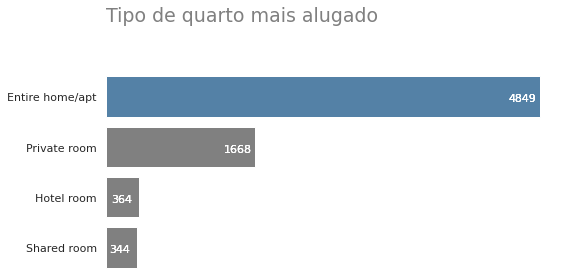

In [36]:
fig, ax = plt.subplots(figsize=(8,4))

indices = df_clean['room_type'].value_counts().index
valores = df_clean['room_type'].value_counts().values

bar_colors = ['grey' if (x < max(valores)) else 'steelblue' for x in valores]

splot = sns.barplot(x=valores, y=indices, palette=bar_colors, data=df_clean, ax=ax)

for p in splot.patches:

    # p.set_color('grey')
    for p in splot.patches:
        width=int(p.get_width())
        plt.text(p.get_width()-193, p.get_y()+0.55*p.get_height(),
                '{}'.format(width),
                ha='center', va='center', color='white', size=11, fontweight='light')

sns.despine(left=True, bottom=True)
ax.set_title('Tipo de quarto mais alugado\n\n', size=19, color='Grey', loc='left')
# ax.text(6000, 0.3, '67.1% dos imóveis alugados\nsão Entire home/apt', size=12, color='Steelblue', fontweight='heavy')
# ax.set_xlim([0,9000])


ax.xaxis.set_visible(False)
plt.tight_layout()

O tipo de imóvel mais alugado no Airbnb de Tóquio é `Entire home/apt` com 4849 registros, cerca de 67.1% dos imóveis alugados.

### **Q6. Qual a localidade mais cara de Tóquio?**



Usando o método `groupby()` podemos agrupar o dataset em função de um atributo. No caso, queremos comparar os bairros (_neighbourhoods_) a partir do preço médio de locação.

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Koganei Shi      486.407507
Komae Shi        445.817694
Musashino Shi    384.718499
Minato Ku        377.071595
Tachikawa Shi    375.335121
Tama Shi         366.398570
Chiyoda Ku       364.407315
Ome Shi          361.742627
Edogawa Ku       338.226230
Shibuya Ku       338.217546
Name: price, dtype: float64

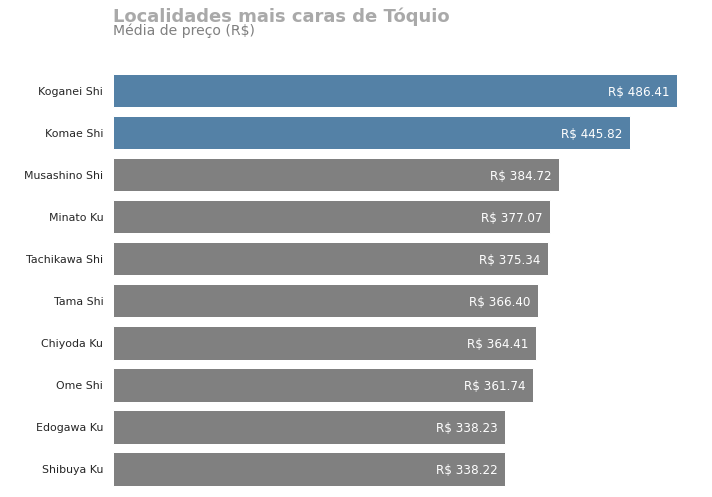

In [49]:
fig, ax = plt.subplots(figsize=(10, 7))

data_plot = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]
bars_colors = ['grey' if (x < 400) else 'steelblue' for x in data_plot.values]


ax.set_title("Localidades mais caras de Tóquio\n\n", size=18, color='darkgrey', fontweight='heavy', loc='left')
plt.suptitle("\nMédia de preço (R$)", x=0.260, size=14, color='grey', fontweight='light',)

ax.set_ylabel([],color='white')
ax.xaxis.set_visible(False)

splot = sns.barplot(x=data_plot.values, 
                    y=data_plot.index, 
                    palette=bars_colors,
                    ax=ax)

for p in splot.patches:
    width=p.get_width()
    plt.text(p.get_width()-33, p.get_y()+0.55*p.get_height(),
             'R$ {:1.2f}'.format(width),
             ha='center', va='center', color='white', size=12)


sns.despine(left=True, bottom=True)

plt.tight_layout()

Aparentemente `Koganei Shi` e `Komae Shi` estão com a média de preço acima das demais regiões.

Verificaremos se isso pode ser um caso de uma amostra não-representativa observando a quantidade de locações registradas para essas regiões.

Uma das formas de fazer uma busca em um _dataset_ é usando o método `.query()`
que funciona como uma _query_ em SQL.


In [39]:
# Quantidade de locações registradas em Koganei Shi
print("Total de Registros: ",df_clean.query("neighbourhood == 'Koganei Shi'").shape[0])

# Verificando os dados de Koganei Shi
df_clean.query("neighbourhood == 'Koganei Shi'")[['neighbourhood', 'price']]

Total de Registros:  2


,neighbourhood,price
549,Koganei Shi,525.469169
2361,Koganei Shi,447.345845


In [40]:
# Quantidade de locações registradas em Komae Shi
print("Total de Registros: ",df_clean.query("neighbourhood == 'Komae Shi'").shape[0])

# Verificando os dados de Komae Shi
df_clean.query("neighbourhood == 'Komae Shi'")[['neighbourhood', 'price']]


Total de Registros:  2


,neighbourhood,price
1576,Komae Shi,569.919571
7233,Komae Shi,321.715818


In [41]:
# Quantidade de locações registradas em Musashino Shi
print("Total de Registros: ",df_clean[df_clean.neighbourhood == "Musashino Shi"].shape[0])

# Verificando os dados de Musashino Shi
df_clean[df_clean.neighbourhood == "Musashino Shi"][['neighbourhood', 'price']]

Total de Registros:  4


,neighbourhood,price
117,Musashino Shi,203.753351
338,Musashino Shi,214.477212
435,Musashino Shi,530.831099
10798,Musashino Shi,589.812332


A média parece diminuir a medida que mais registros são adicionados, para comprovar essa hipótese analisaremos os dados da menor média de preço (`Shibuya Ku`) que por sinal, se refere a um dos principais centros comerciais e financeiros do mundo.

In [42]:
# Quantidade de locações registradas em Shibuya Ku
print("Total de Registros: ",df_clean.query("neighbourhood == 'Shibuya Ku'").shape[0])
print("Preço Mínimo: R$",round(df_clean.query("neighbourhood == 'Shibuya Ku'")['price'].min(),2))
print("Preço Máximo: R$",round(df_clean.query("neighbourhood == 'Shibuya Ku'")['price'].max(),2))

# Verificando os dados de Shibuya Ku
df_clean.query("neighbourhood == 'Shibuya Ku'")[['neighbourhood', 'price']]

Total de Registros:  346
Preço Mínimo: R$ 107.24
Preço Máximo: R$ 632.71


,neighbourhood,price
92,Shibuya Ku,273.994638
99,Shibuya Ku,176.193029
101,Shibuya Ku,428.954424
102,Shibuya Ku,160.857909
111,Shibuya Ku,402.144772
...,...,...
11234,Shibuya Ku,182.305630
11263,Shibuya Ku,303.324397
11336,Shibuya Ku,367.667560
11351,Shibuya Ku,248.900804


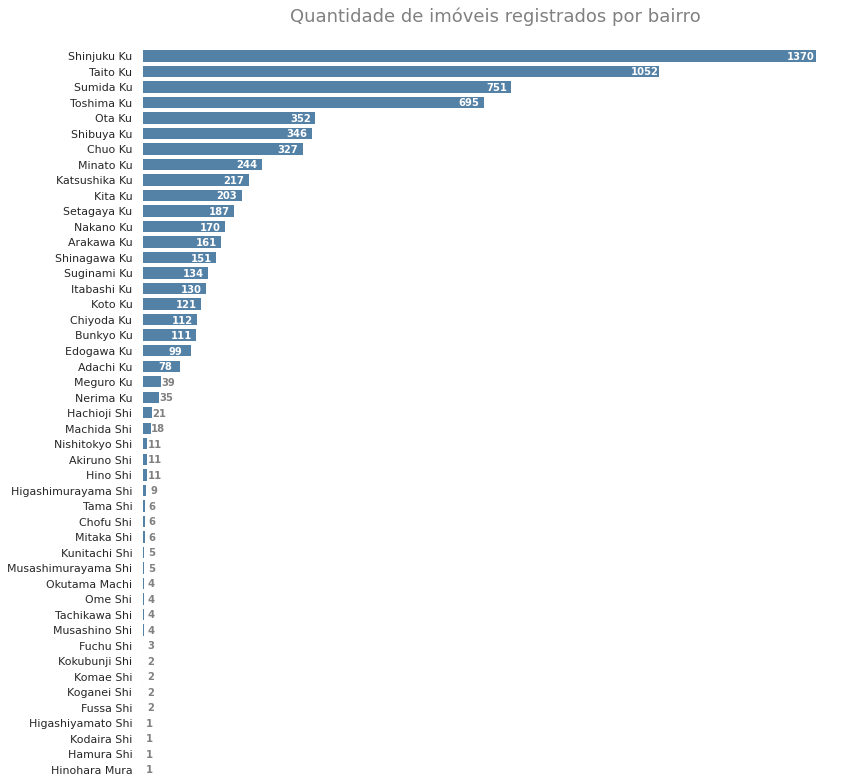

In [61]:
fig, ax = plt.subplots(figsize=(12,11))

neighbourhood_count = df_clean['neighbourhood'].value_counts(ascending=False)

splot = sns.barplot(x=neighbourhood_count.values, y=neighbourhood_count.index, color='steelblue', ax=ax)

for p in splot.patches:
    width=int(p.get_width())
    if width <= 70:
        plt.text(p.get_width()+15, p.get_y()+0.55*p.get_height(),
                '{}'.format(width),
                ha='center', va='center', color='grey', fontweight='bold')
        
    elif width > 70:
        plt.text(p.get_width()-30, p.get_y()+0.55*p.get_height(),
                '{}'.format(width),
                ha='center', va='center', color='white', fontweight='bold')
        


# sns.barplot(x=nei)
ax.set_title('Quantidade de imóveis registrados por bairro\n', size=18, color='grey')
sns.despine(left=True, bottom=True)
ax.xaxis.set_visible(False)

plt.tight_layout()

Como observado, há realmente um caso de amostra não-representativa, visto que há somente dois registros para ambas as regiões com as maiores médias de preços fazendo com que sua média seja mais elevada em relação as outras.

Como temos a informação sobre a Latitude e Longitude dos imóveis, podemos plotar cada ponto levando em consideração `x=longitude` e `y=latitude` e assim teremos um mapa de Tóquio onde podemos identificar a localização das casas e seus `price`.

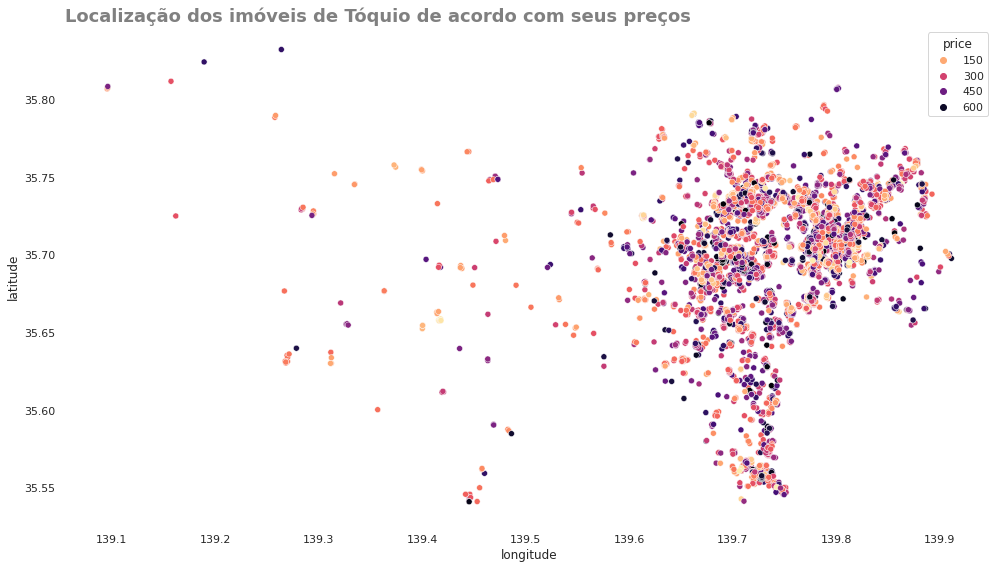

In [55]:
# Plotando um gráfico dos imóveis pela latitude-longitude e diferenciando por preço
fig, ax = plt.subplots(figsize=(14,8))

sns.scatterplot(x="longitude", y="latitude", data=df_clean, hue="price", palette="magma_r")
ax.set_title("Localização dos imóveis de Tóquio de acordo com seus preços", size=18, loc='left', color='grey', fontweight='bold')
sns.despine(left=True, bottom=True)


plt.tight_layout()

Utilizando a biblioteca [__`folium`__](https://python-visualization.github.io/folium/) podemos plotar um mapa interativo de Tóquio e usar as coordenadas disponíveis no dataset para ver como as locações se distribuem pelo mapa.

In [56]:
# Instalando o folium para plot do mapa
!pip install folium -q

In [57]:
# Importando o folium
import folium

print(folium.__version__)

0.8.3


Fazendo uma pesquisa rápida, descobrimos que a latitude e longitude de Tóquio são `35.652832` e `139.839478`.

Precisamos passar essas coordenadas para plotar o mapa de Tóquio no Folium.

In [58]:
# Gerando o mapa de Tóquio

toquio = folium.Map(width="70%", height="70%",
                    location=[35.652832, 139.839478], 
                    tiles="Stamen Terrain", 
                    zoom_start=9.6,
                    min_zoom=9,
                    max_zoom=13
                    )

# Exibindo o mapa
toquio

In [59]:
# Gerando uma lista com a latitude e longitude dos imóveis do Airbnb de Tóquio

coords = []

for lat, lng in zip(df_clean.latitude.values, df_clean.longitude.values):
    coords.append([lat, lng])

print(coords)

[[35.65833, 139.67153000000002], [35.690979999999996, 139.70618000000002], [35.74409, 139.79895], [35.698570000000004, 139.704], [35.698479999999996, 139.70432], [35.69847, 139.70433], [35.698479999999996, 139.70433], [35.65918, 139.61021000000002], [35.6591, 139.61036000000001], [35.69279, 139.70928999999998], [35.61626, 139.72338], [35.69847, 139.70433], [35.698479999999996, 139.70433], [35.698479999999996, 139.70435], [35.698479999999996, 139.70433], [35.780770000000004, 139.63208999999998], [35.78116, 139.63145], [35.61668, 139.66756999999998], [35.72672, 139.78201], [35.72873, 139.7336], [35.61869, 139.66025], [35.69847, 139.70432], [35.698479999999996, 139.70432], [35.7034, 139.59892], [35.68577, 139.78368], [35.70915, 139.48057], [35.59725, 139.72744], [35.72779, 139.78991000000002], [35.67719, 139.67917], [35.69138, 139.67812], [35.68078, 139.67729], [35.68127, 139.67698000000001], [35.67969, 139.67656000000002], [35.69872, 139.70276], [35.66339, 139.68741], [35.66339, 139.6874

Adicionando as coordenadas dos imóveis no mapa, gerando um _heatmap_ mostrando a concentração de imóveis.

In [60]:
# Importando o módulo Heatmap
from folium.plugins import HeatMap

# Adicionando as coordenadas ao mapa
toquio.add_child(HeatMap(coords, blur=25, radius=20))

# Exibindo o mapa
toquio

## Conclusões


Mesmo usando a versão resumida de um _dataset_ maior, pode-se extrair _insights_ interessantes a respeito dos dados tais como:
* Presença de _outliers_;
* A quantidade de imóveis disponíveis em uma região interfere nas informações de outras _features_.

Devemos ressaltar a importância de tratar e analisar bem os dados e não tomar decisões apenas nos dados estatísticos mostrados, como por exemplo se basear na média pois a mesma é sensível a _outliers_ que podem não condizer com a realidade.

Por se tratar de uma _dataset_ menor, foi feita uma análise superficial dessa base de dados resumida. Recomenda-se que, futuramente, seja feita uma análise exploratória mais detalhada usando o conjunto de dados completo, contendo 106 _features_ (atributos).